In [1]:
headers = ["APS", "ABPS", "SUBARP","MISS_MAC", "CLASS"]
    

In [2]:
import csv#load features-file.csv file and convert it to a list
with open('features-file.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    reader = list(reader)
    

In [3]:
reader

[['40.333333333333336', '245.0', '119', '0', '0'],
 ['68.66666666666667', '85.0', '148', '0', '0'],
 ['89.66666666666667', '16.666666666666668', '105', '0', '0'],
 ['78.33333333333333', '1.6666666666666667', '33', '0', '0'],
 ['43.0', '0.0', '5', '0', '0'],
 ['16.0', '0.0', '0', '0', '0'],
 ['1.3333333333333333', '0.0', '0', '0', '0'],
 ['1.3333333333333333', '0.0', '0', '0', '0'],
 ['7.333333333333333', '0.0', '0', '0', '0'],
 ['16.0', '0.0', '0', '0', '0'],
 ['27.333333333333332', '0.0', '0', '0', '0'],
 ['40.0', '0.0', '0', '0', '0'],
 ['50.0', '0.0', '0', '0', '0'],
 ['43.333333333333336', '0.0', '0', '0', '0'],
 ['38.0', '0.0', '0', '0', '0'],
 ['38.0', '0.0', '0', '0', '0'],
 ['28.0', '0.0', '0', '0', '0'],
 ['22.333333333333332', '0.0', '1', '0', '0'],
 ['18.666666666666668', '0.0', '0', '0', '0'],
 ['22.666666666666668', '0.0', '0', '0', '0'],
 ['30.0', '0.0', '0', '0', '0'],
 ['38.666666666666664', '0.0', '0', '0', '0'],
 ['40.0', '0.0', '0', '0', '0'],
 ['34.0', '0.0', '0', '

In [4]:
# save them with header to become dataframe
import pandas as pd
df = pd.DataFrame(reader, columns=headers)
df


,APS,ABPS,SUBARP,MISS_MAC,CLASS
0,40.333333333333336,245.0,119,0,0
1,68.66666666666667,85.0,148,0,0
2,89.66666666666667,16.666666666666668,105,0,0
3,78.33333333333333,1.6666666666666667,33,0,0
4,43.0,0.0,5,0,0
...,...,...,...,...,...
792,38.666666666666664,0.0,0,0,0
793,36.666666666666664,0.0,0,0,0
794,27.333333333333332,0.0,0,0,0
795,29.0,0.0,1,0,0


In [5]:
#drop CLASS column and TIME column
X = df.drop(['CLASS'], axis=1)
X

KeyError: "['TIME'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['CLASS'], test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(319, 4) (80, 4) (319,) (80,)


In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
model_neural = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500) 
#explain hidden_layer_sizes: 3 layers with 13 neurons each layer

In [ ]:
#train the model
MitM_nn = model_neural.fit(X_train, y_train)


/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#print Score
print("Score: ", MitM_nn.score(X_test, y_test))

Score:  0.9375


In [ ]:
predictions = MitM_nn.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predictions': predictions})
results.head()

,Actual,Predictions
198,0,0
349,1,1
33,0,0
208,0,0
93,0,0


[[46  1]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.97      0.88      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



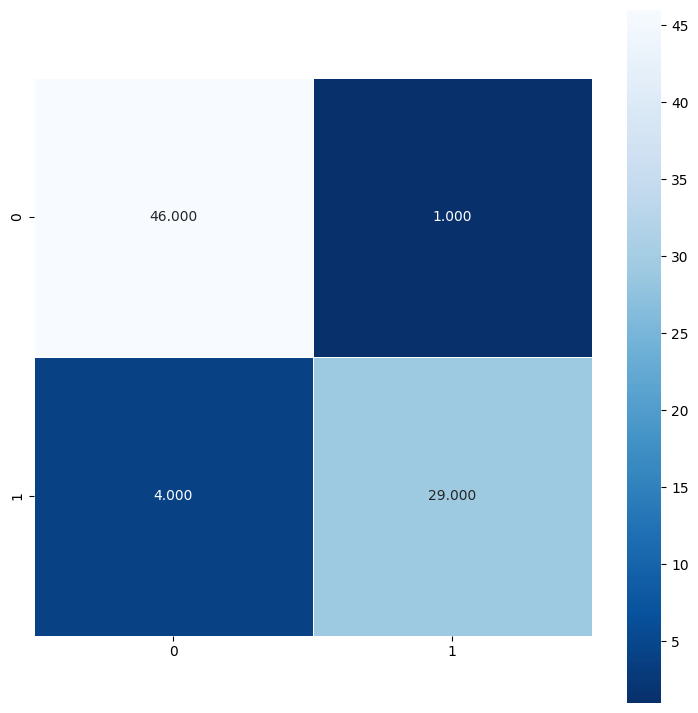

In [ ]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))



In [ ]:
#extract the model to pickle file
# import pickle
# pickle.dump(MitM_nn, open('MitM_nn', 'wb'))